Dans cette partie, il s'agit d'apprendre à utiliser Pandas. C'est le module le plus important pour la Data. La structure clef de ce module est le DataFrame.

In [18]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

df=pd.read_excel('titanic.xls')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [19]:
df.shape
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

Eliminer des colonnes qui ne servent à rien.

In [20]:
df=df.drop(["name","sibsp","parch","ticket","fare","cabin","embarked","boat","body","home.dest"],axis=1)

In [21]:
df.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [22]:
df.describe()

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


Eliminer les lignes dans lesquelles il y a des valeurs manquantes.

In [26]:
df=df.dropna(axis=0)
df.describe()

,pclass,survived,age
count,1046.000000,1046.000000,1046.000000
mean,2.207457,0.408222,29.881135
std,0.841497,0.491740,14.413500
min,1.000000,0.000000,0.166700
25%,1.000000,0.000000,21.000000
50%,2.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [27]:
df['pclass'].value_counts() #passagers par classe

pclass
3    501
1    284
2    261
Name: count, dtype: int64

<Axes: xlabel='pclass'>

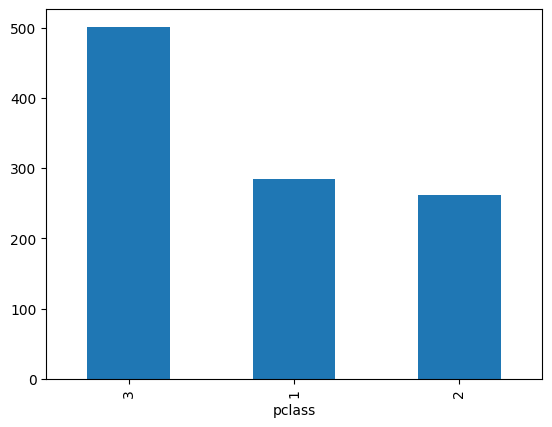

In [28]:
df["pclass"].value_counts().plot.bar()

<Axes: ylabel='Frequency'>

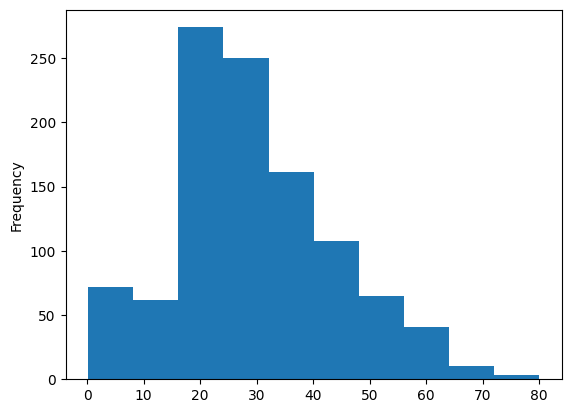

In [29]:
df["age"].plot.hist()

Faire des requêtes de type SQL.

In [31]:
df.groupby(['sex','pclass']).mean()

survived        age
sex    pclass                     
female 1       0.962406  37.037594
       2       0.893204  27.499191
       3       0.473684  22.185307
male   1       0.350993  41.029250
       2       0.145570  30.815401
       3       0.169054  25.962273

In [33]:
df[df['age']<18].groupby(['sex','pclass']).mean() #les passagers mineurs

survived        age
sex    pclass                     
female 1       0.875000  14.125000
       2       1.000000   8.273150
       3       0.543478   8.416667
male   1       0.857143   9.845243
       2       0.733333   6.222220
       3       0.233333   9.838888

Faire de sclicing comme sur les listes avec un DataFrame.

In [36]:
df.iloc[0] #iloc pour travailler sur les lignes 

pclass           1
survived         1
sex         female
age           29.0
Name: 0, dtype: object

In [37]:
df.loc[0] #a reprendre

pclass           1
survived         1
sex         female
age           29.0
Name: 0, dtype: object

Exercice : feature ingineering 

In [38]:
cat0=df[df['age']<20]
print(cat0)

      pclass  survived     sex      age
1          1         1    male   0.9167
2          1         0  female   2.0000
11         1         1  female  18.0000
27         1         1  female  19.0000
53         1         0    male  17.0000
...      ...       ...     ...      ...
1275       3         0    male  16.0000
1279       3         0  female  14.0000
1288       3         0    male  18.0000
1300       3         1  female  15.0000
1304       3         0  female  14.5000

[225 rows x 4 columns]


In [42]:
cat1=df[(df['age']>20) & (df['age']<30)]
print(cat1)

      pclass  survived     sex   age
0          1         1  female  29.0
4          1         0  female  25.0
12         1         1  female  24.0
13         1         1  female  26.0
16         1         0    male  24.0
...      ...       ...     ...   ...
1296       3         0    male  27.0
1299       3         0    male  27.0
1306       3         0    male  26.5
1307       3         0    male  27.0
1308       3         0    male  29.0

[321 rows x 4 columns]


Transformer une catégorie en donnée numérique

In [45]:
df['sex'].map({'male':0,'female':1})
df['sex'].replace(['male','female'],[0,1])
df['sex'].astype('category').cat.codes

C:\Users\qevan\AppData\Local\Temp\ipykernel_21596\1208195136.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'].replace(['male','female'],[0,1])


0       0
1       1
2       0
3       1
4       0
       ..
1301    1
1304    0
1306    1
1307    1
1308    1
Length: 1046, dtype: int8